### Тема “Обучение с учителем”. Задание 1


#### ЛИНЕЙНАЯ РЕГРЕССИЯ

In [16]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt

In [17]:
dataset_boston = load_boston()
bds_data = dataset_boston['data']
bds_target = dataset_boston['target']

In [18]:
X = pd.DataFrame(
    bds_data,
    columns=dataset_boston['feature_names']
)
y = pd.DataFrame(
    bds_target,
    columns=['target']
)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)


In [20]:
initial_r2 = r2_score(y_test, y_pred)
initial_r2

0.7112260057484973

Text(0, 0.5, 'прогноз')

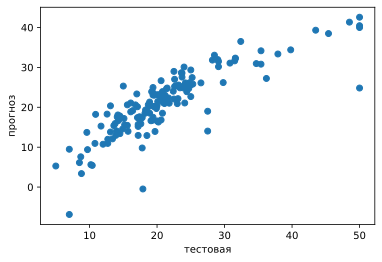

In [21]:
plt.scatter(y_test, y_pred)
plt.xlabel('тестовая')
plt.ylabel('прогноз')

### Тема “Обучение с учителем”. Задание 2

In [22]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(criterion='mse',
                                 max_depth=12, 
                                 min_samples_leaf=2,
                                 random_state=42,
                                 n_estimators=100
                                 )
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)
model.fit(X_train, y_train.values[:, 0])
y_test_preds = model.predict(X_valid)
initial_r6 = r2_score(y_valid, y_test_preds)
initial_r6

0.8583421706302049

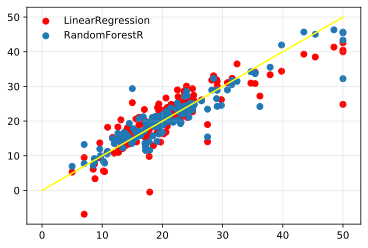

In [31]:
plt.scatter(y_test, y_pred, color='red', label='LinearRegression')
plt.scatter(y_valid, y_test_preds, label='RandomForestR')
plt.plot([0, 50], [0, 50], color='yellow')
plt.grid(alpha=0.3)
plt.legend(frameon=False)

Вывод: при сравнении двух моделей машинного обучения LinearRegression (далее - Первая модель) и RandomForest (далее - Вторая модель) можно сделать вывод о том, что Первая модель имеет меньшую точность и больший разброс в том числе на нескученных данных, тогда как Вторая модель лучше справилась с неподготовленными (не отчищенными) данными.  

### Тема “Обучение с учителем”. Задание 3

In [36]:
model.feature_importances_

array([0.02758883, 0.00152508, 0.00543267, 0.00087582, 0.01127935,
       0.44523753, 0.01295989, 0.06156155, 0.00466838, 0.00953832,
       0.02239594, 0.00947796, 0.38745868])

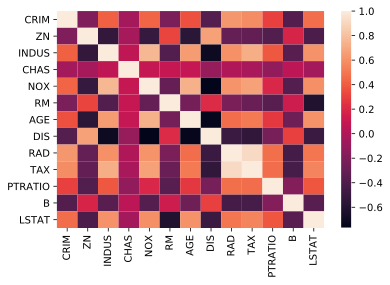

In [40]:
import seaborn as sns
sns.heatmap(X.corr()) #посмотрим матрицу корреляций для определения мультиколлинеарности

In [58]:
feature_importances = pd.DataFrame(zip(X_train.columns, model.feature_importances_), 
                                   columns=['feature_name', 'importance'])
feature_importances.sort_values(by='importance', ascending=False, inplace=True)
feature_importances

,feature_name,importance
5,RM,0.445238
12,LSTAT,0.387459
7,DIS,0.061562
0,CRIM,0.027589
10,PTRATIO,0.022396
6,AGE,0.012960
4,NOX,0.011279
9,TAX,0.009538
11,B,0.009478
2,INDUS,0.005433


In [44]:
feature_importances.head(2) # Самые важные признаки

,feature_name,importance
5,RM,0.445238
12,LSTAT,0.387459


In [57]:
np.sum(feature_importances['importance'].values[0:-3]) # Признаки RAD, ZN, CHAS крайне малозначимы 

0.9929307171942067

### Тема “Обучение с учителем”. Задание 4

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [67]:
d = pd.read_csv('C:/Users/Anokiro/creditcard.csv', sep= ',')
d.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0


In [102]:
df = pd.DataFrame(d, columns=d.columns)
df['V1'].value_counts(normalize=True, dropna=False) * 100

 2.055797    0.027036
 1.245674    0.027036
 2.053311    0.021769
 1.302378    0.021067
 2.040211    0.018609
               ...   
-0.069327    0.000351
-1.619420    0.000351
 1.174923    0.000351
 2.157306    0.000351
 2.287784    0.000351
Name: V1, Length: 275663, dtype: float64

In [141]:
for i in df.columns:
    if True in df[i].isna().unique() or df[i].isnull().unique():
        print(f"!!! В данных есть пропуски, а именно в {i}")
    else:
        print(f'{i}. В этих данных нет пропусков')

Time. В этих данных нет пропусков
V1. В этих данных нет пропусков
V2. В этих данных нет пропусков
V3. В этих данных нет пропусков
V4. В этих данных нет пропусков
V5. В этих данных нет пропусков
V6. В этих данных нет пропусков
V7. В этих данных нет пропусков
V8. В этих данных нет пропусков
V9. В этих данных нет пропусков
V10. В этих данных нет пропусков
V11. В этих данных нет пропусков
V12. В этих данных нет пропусков
V13. В этих данных нет пропусков
V14. В этих данных нет пропусков
V15. В этих данных нет пропусков
V16. В этих данных нет пропусков
V17. В этих данных нет пропусков
V18. В этих данных нет пропусков
V19. В этих данных нет пропусков
V20. В этих данных нет пропусков
V21. В этих данных нет пропусков
V22. В этих данных нет пропусков
V23. В этих данных нет пропусков
V24. В этих данных нет пропусков
V25. В этих данных нет пропусков
V26. В этих данных нет пропусков
V27. В этих данных нет пропусков
V28. В этих данных нет пропусков
Amount. В этих данных нет пропусков
Class. В этих д

In [140]:
(df.isna() is True), (df.isnull() is True)

(False, False)

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [142]:
pd.options.display.max_columns = 100

In [143]:
d.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [147]:
X = df.drop('Class', axis=1)

In [151]:
y = pd.Series(df['Class'])

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

In [154]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((199364, 30), (85443, 30), (199364,), (85443,))

In [155]:
parameters = [{'n_estimators': [10, 15],
                'max_features': np.arange(3, 5),
                'max_depth': np.arange(4, 7)}]

clf = GridSearchCV(estimator=RandomForestClassifier(random_state=100),
    param_grid=parameters,
    scoring='roc_auc',
    cv=3)

In [156]:
clf.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=100,
                                 

In [158]:
clf.best_params_

{'max_depth': 6, 'max_features': 3, 'n_estimators': 15}

In [170]:
y_proba = clf.predict_proba(X_test)
y_pred_proba = y_proba[:, 1]
from sklearn.metrics import roc_auc_score

In [175]:
roc_auc_score(y_test, y_pred_proba)

0.9462664156037156

In [198]:
y_proba_t = clf.predict_proba(X_train)
y_proba_train = y_proba_t[:, 1]
roc_auc_score(y_train, y_proba_train)

0.9703527882554751